In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


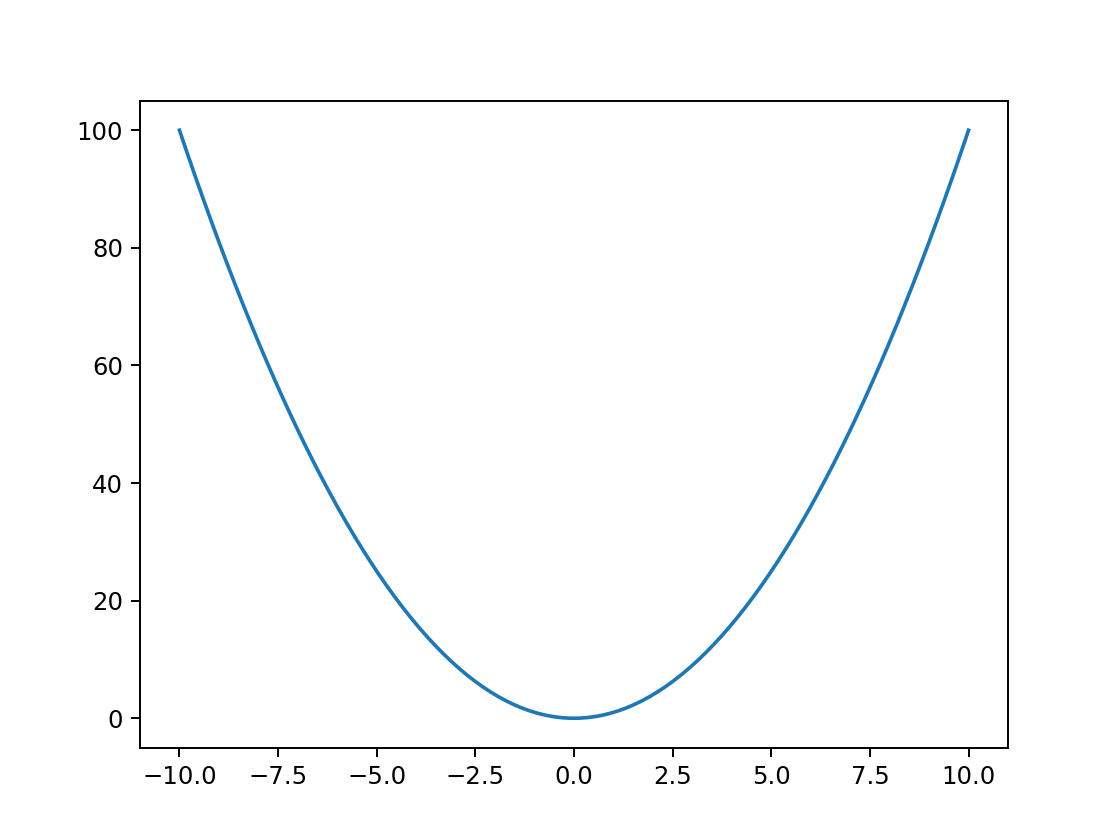

In [2]:
x = np.linspace(-10, 10, 100)
y = x ** 2
plt.figure()
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


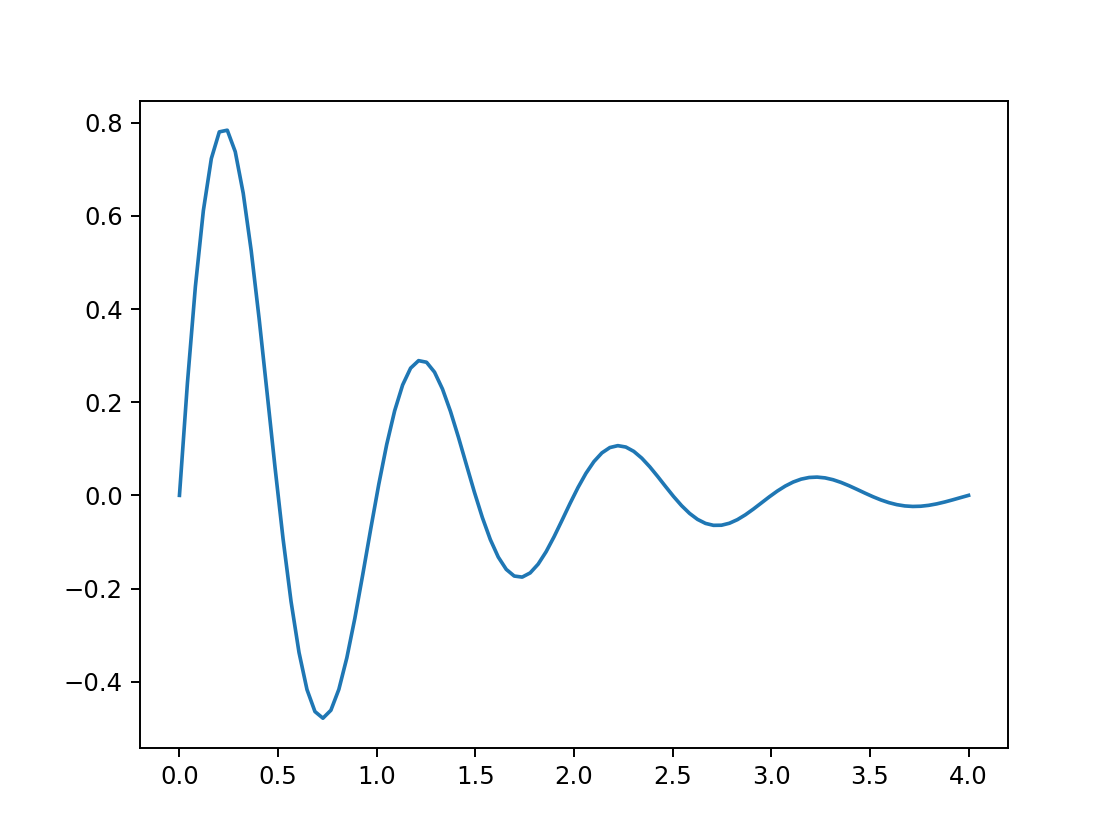

In [3]:
x = np.linspace(0, 4, 100)
y = np.exp(-x)*np.sin(2*np.pi*x)
plt.figure()
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


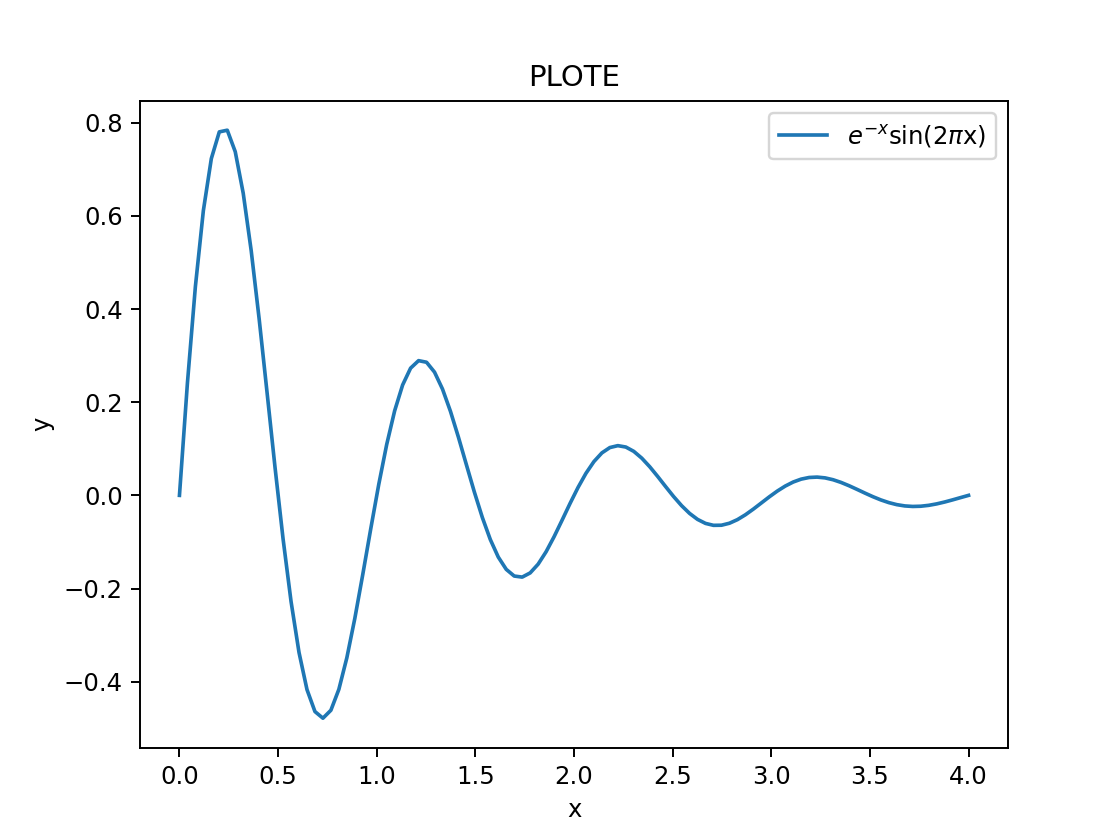

In [4]:
x = np.linspace(0, 4, 100)
y = np.exp(-x)*np.sin(2*np.pi*x)
plt.figure()
plt.plot(x, y, label="$e^{-x}$sin(2$\pi$x)")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.title('PLOTE')
plt.show()

plot $e^{-x}\sin{(2 \pi x)}$ and $e^{-2x}\sin{(4 \pi x)}$ in the same plot

<IPython.core.display.Javascript object>


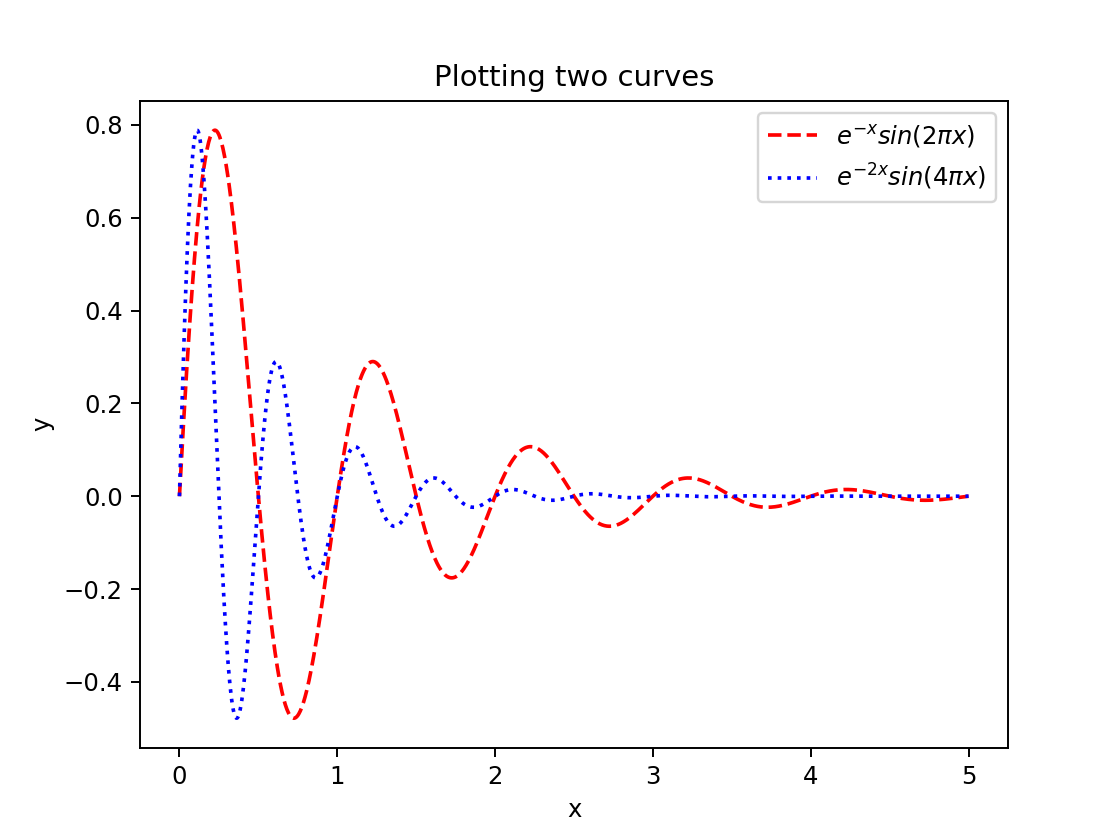

In [5]:
x = np.linspace(0, 5, 1000)
y1 = np.exp(-x)*np.sin(2*np.pi*x)
y2 = np.exp(-2*x)*np.sin(4*np.pi*x)

plt.figure()
plt.plot(x, y1, 'r--', label="$e^{-x}sin(2 \pi x)$")
plt.plot(x, y2, 'b:', label="$e^{-2x}sin(4 \pi x)$")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Plotting two curves')

plt.show()

<IPython.core.display.Javascript object>


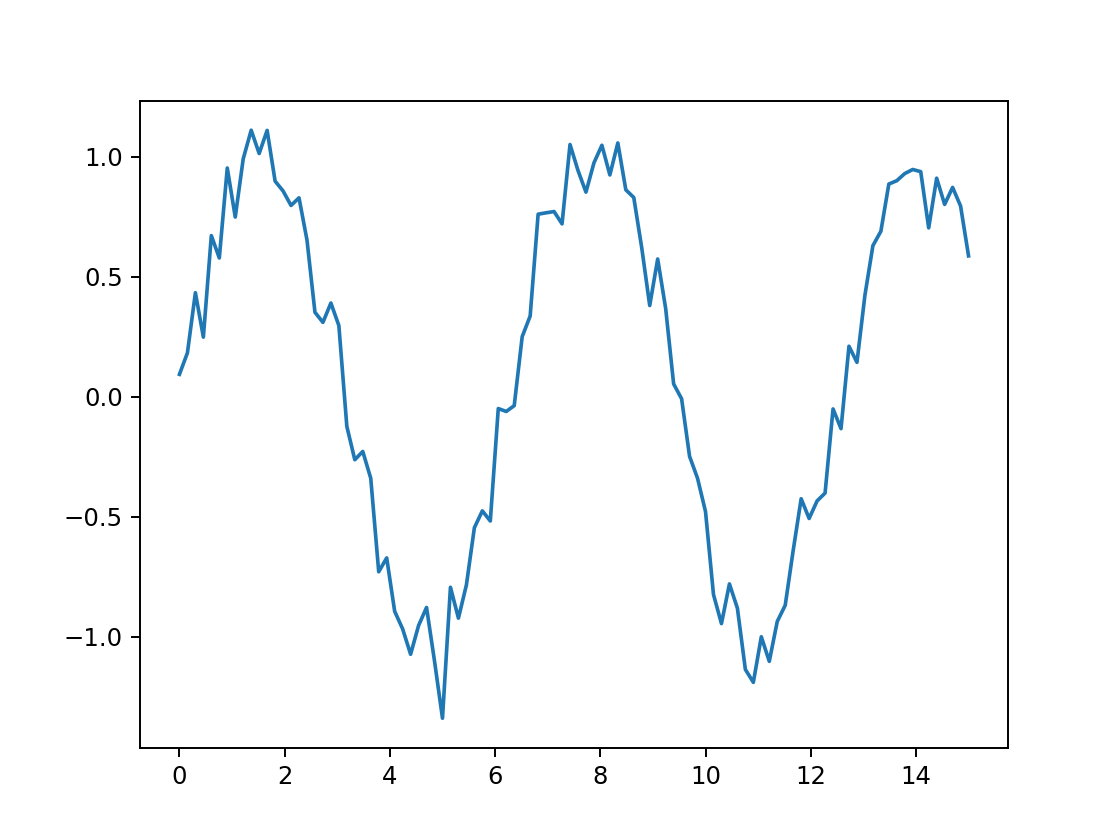

In [6]:
x = np.linspace(0, 15, 100)
y = np.sin(x) + 0.1*np.random.randn(len(x))

plt.figure()
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


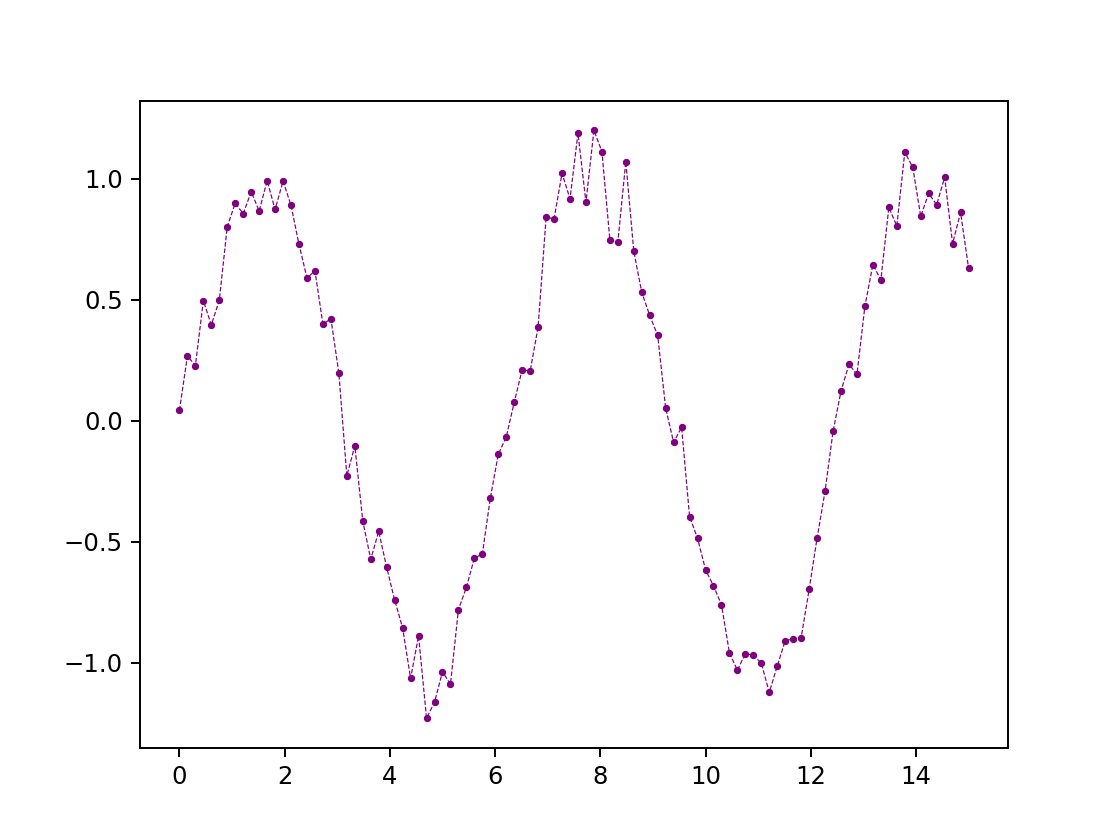

In [7]:
x = np.linspace(0, 15, 100)
y = np.sin(x) + 0.1*np.random.randn(len(x))

plt.figure()
plt.plot(x, y, 'o--', color='purple', lw=0.5, ms=2)
plt.show()

<IPython.core.display.Javascript object>


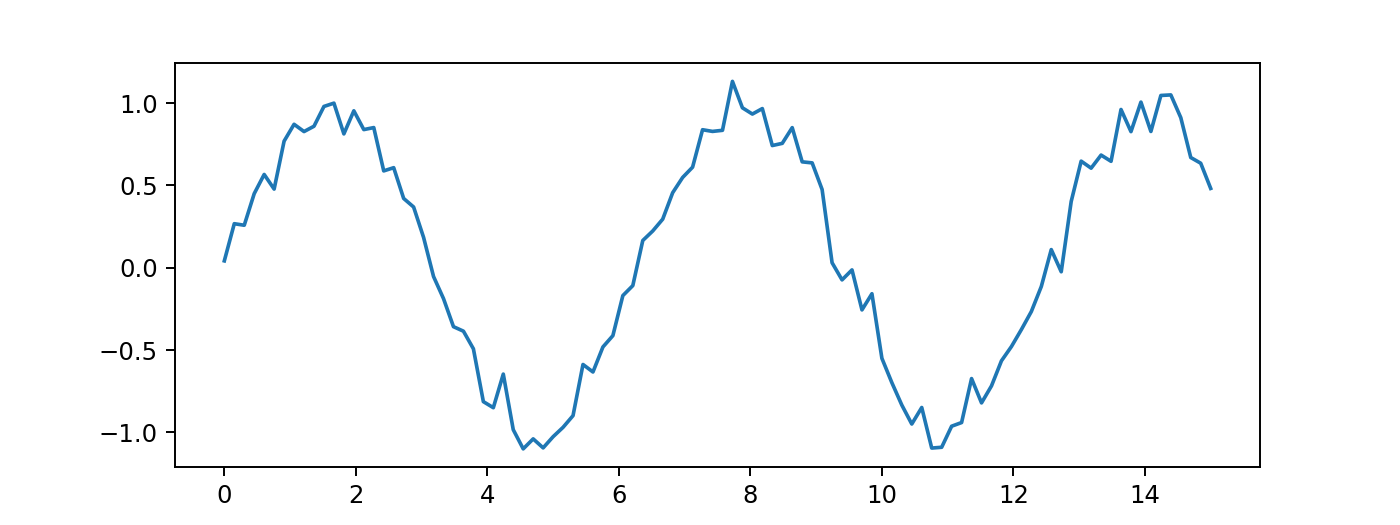

In [9]:
x = np.linspace(0, 15, 100)
y = np.sin(x) + 0.1*np.random.randn(len(x))

plt.figure(figsize=(8, 3))
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


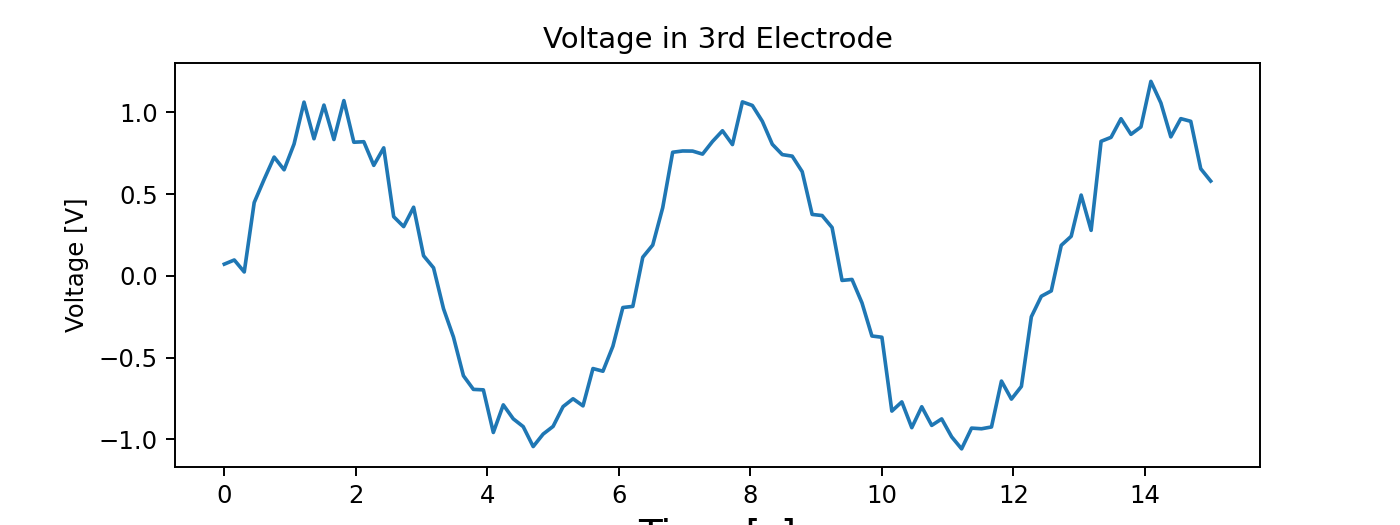

In [10]:
x = np.linspace(0, 15, 100)
y = np.sin(x) + 0.1*np.random.randn(len(x))

plt.figure(figsize=(8, 3))
plt.plot(x, y)
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.show()

<IPython.core.display.Javascript object>


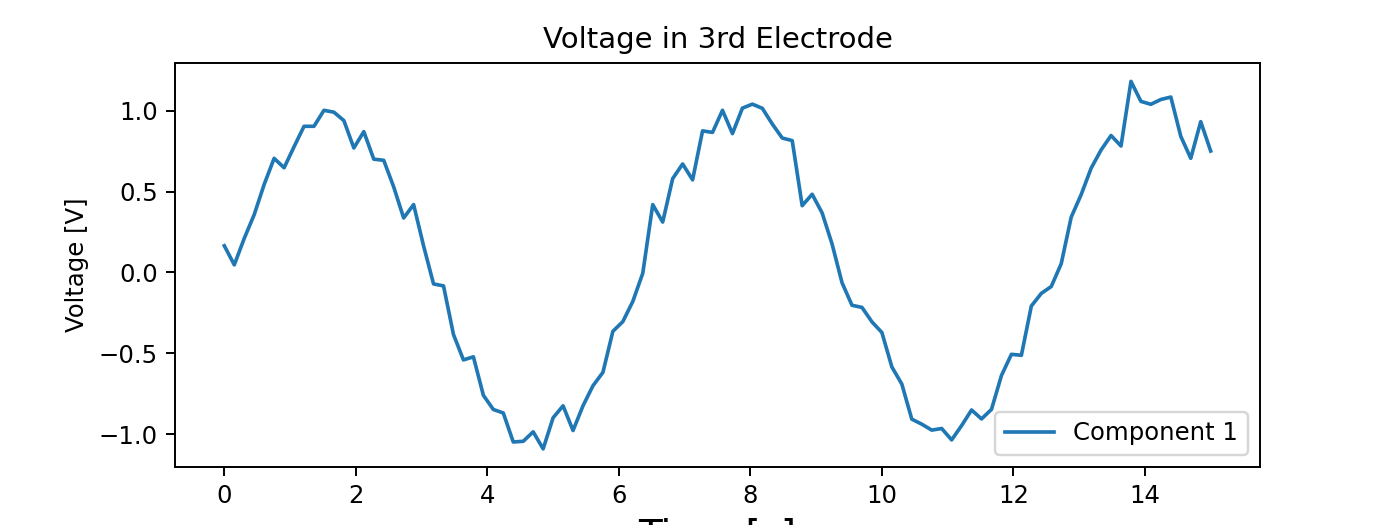

In [11]:
x = np.linspace(0, 15, 100)
y = np.sin(x) + 0.1*np.random.randn(len(x))

plt.figure(figsize=(8, 3))
plt.plot(x, y, label='Component 1')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.legend(loc='lower right', fontsize=10)
plt.show()

Plot the Heaviside function:

$$H(x)=\begin{cases}
          0, & \quad x < 0 \\
          1, & \quad x \geq 0
     \end{cases}$$

In [12]:
def heaviside(x):
    return np.where(x < 0, 0, 1)

<IPython.core.display.Javascript object>


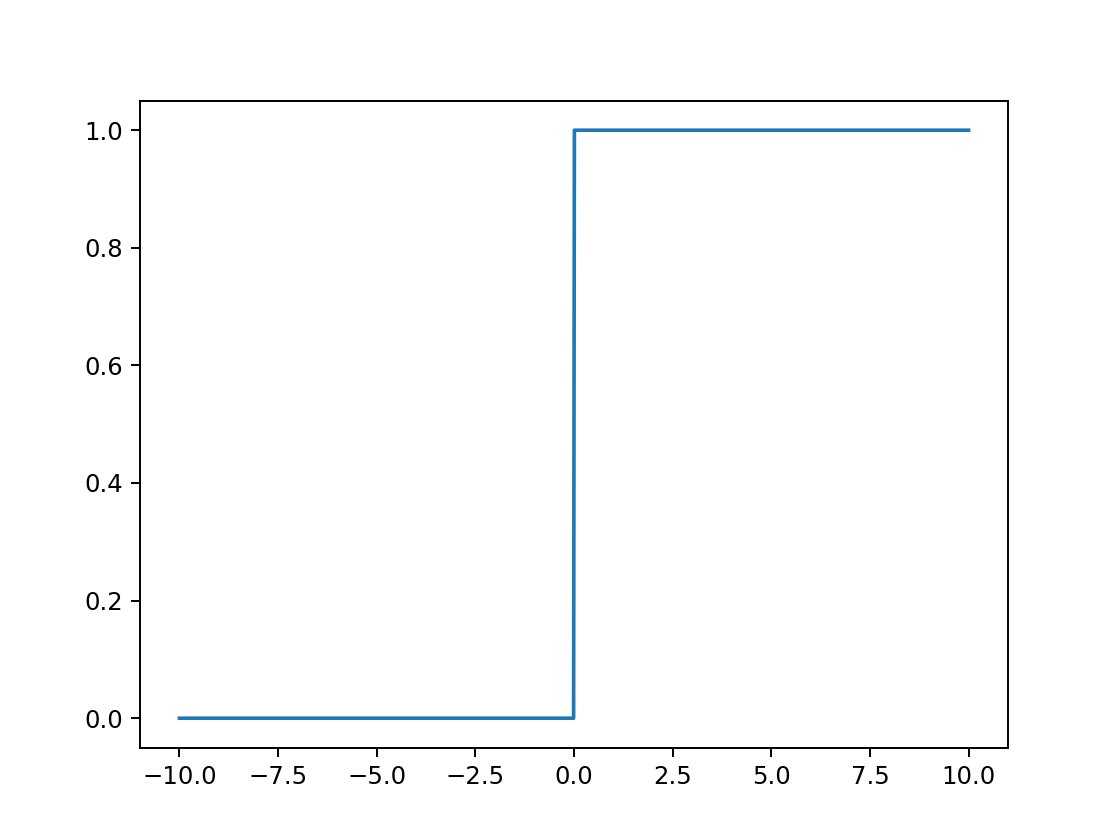

In [13]:
x = np.linspace(-10, 10, 1000)
y = heaviside(x)

plt.figure()
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


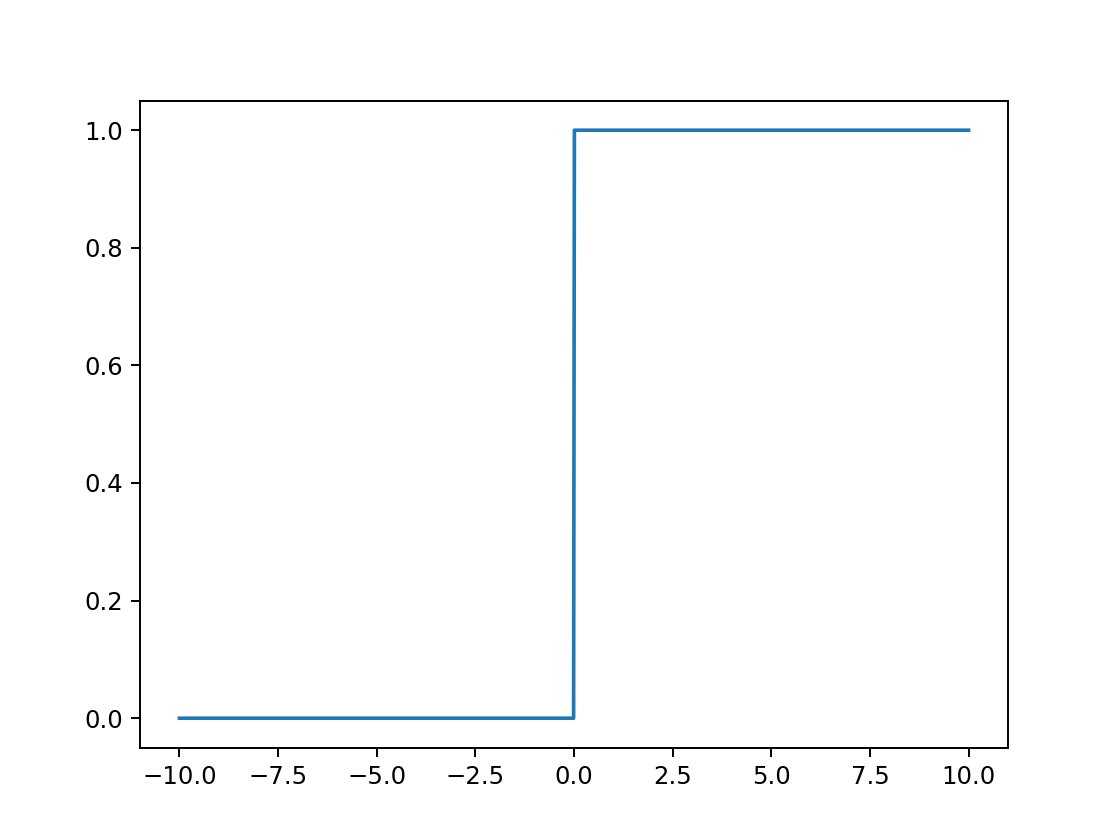

In [14]:
x = np.linspace(-10, 10, 1000)
y = np.piecewise(x, [x < 0, x>=0], [0, 1])

plt.figure()
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


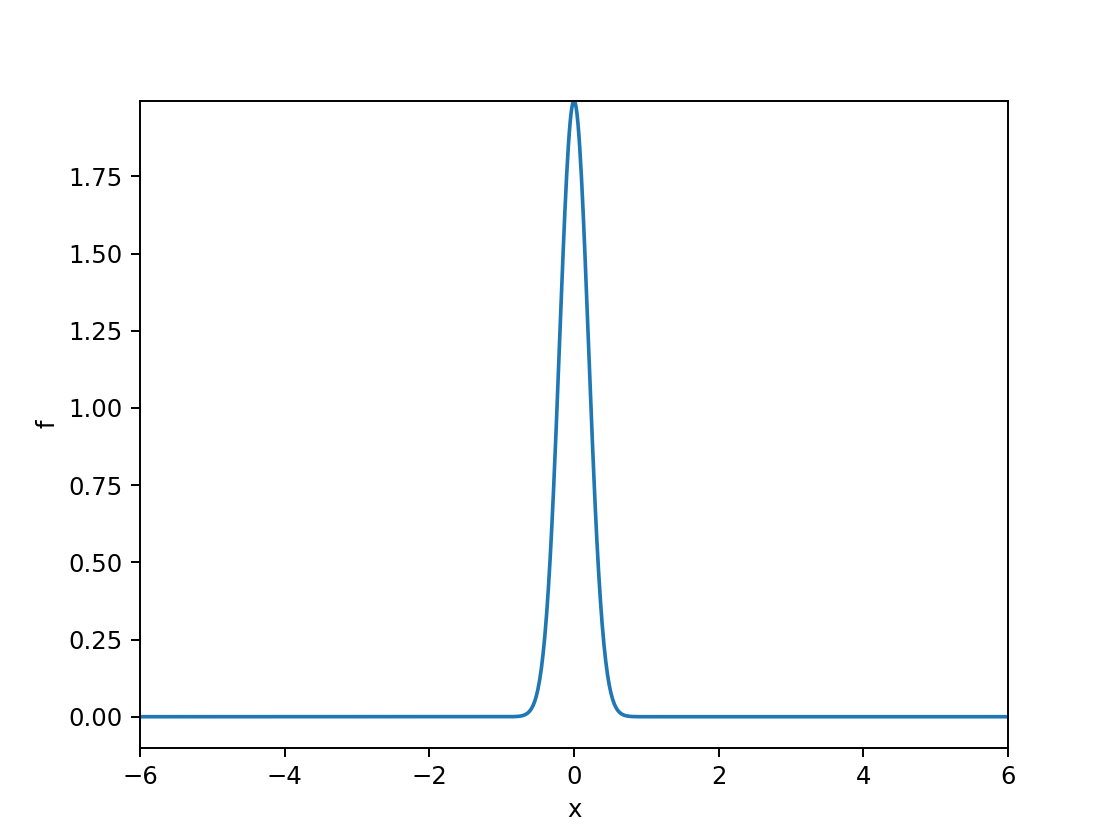

In [15]:
def f(x, m, s):
    return (1.0/(np.sqrt(2*np.pi)*s))*np.exp(-0.5*((x-m)/s)**2)

m = 0
s_start = 2
s_stop = 0.2
s_values = np.linspace(s_start, s_stop, 30)

x = np.linspace(m-3*s_start, m+3*s_start, 1000)
max_f = f(m, m, s_stop)

plt.figure()
y = f(x, m, s_stop)
lines = plt.plot(x, y)

plt.axis([x[0], x[-1], -0.1, max_f])
plt.xlabel('x')
plt.ylabel('f')

for s in s_values:
    y = f(x, m, s)
    lines[0].set_ydata(y)
    plt.draw()
    plt.pause(0.1)


<IPython.core.display.Javascript object>


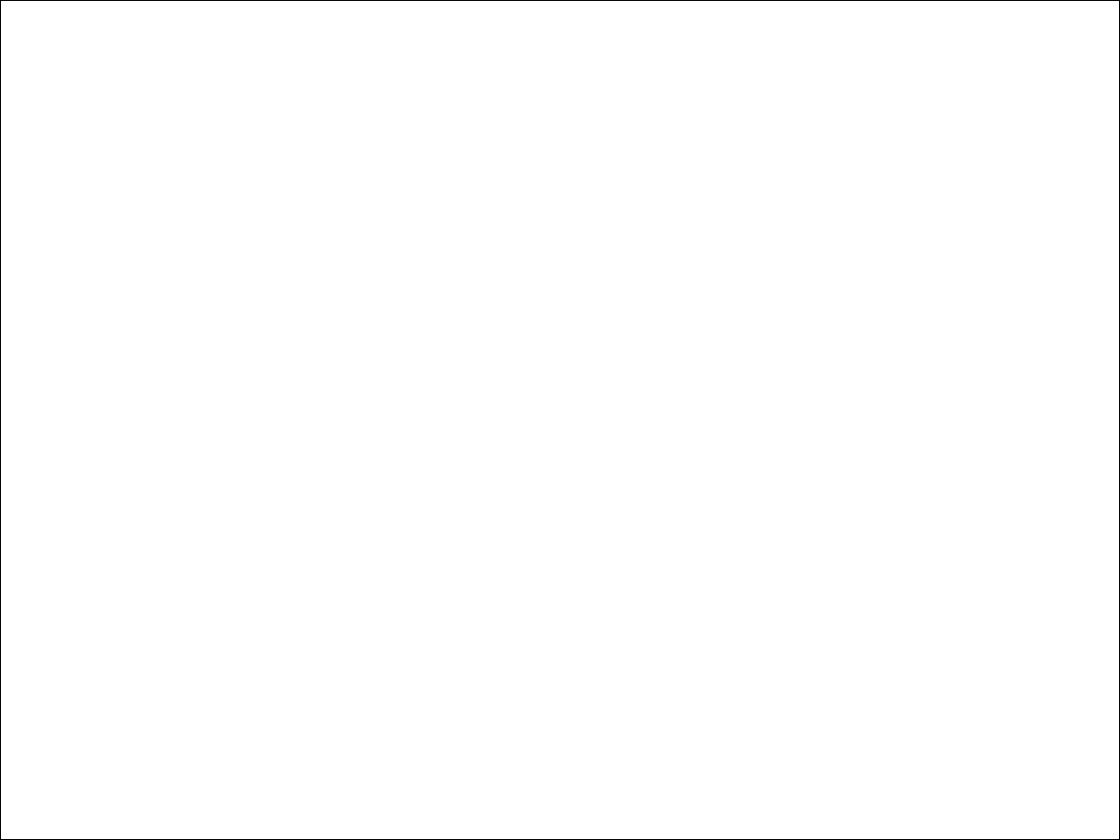

In [16]:
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

class ParticleBox:
    """Orbits class

    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt

        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2)

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
# np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])

    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=10000,
                              interval=10, blit=True, init_func=init)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

<IPython.core.display.Javascript object>


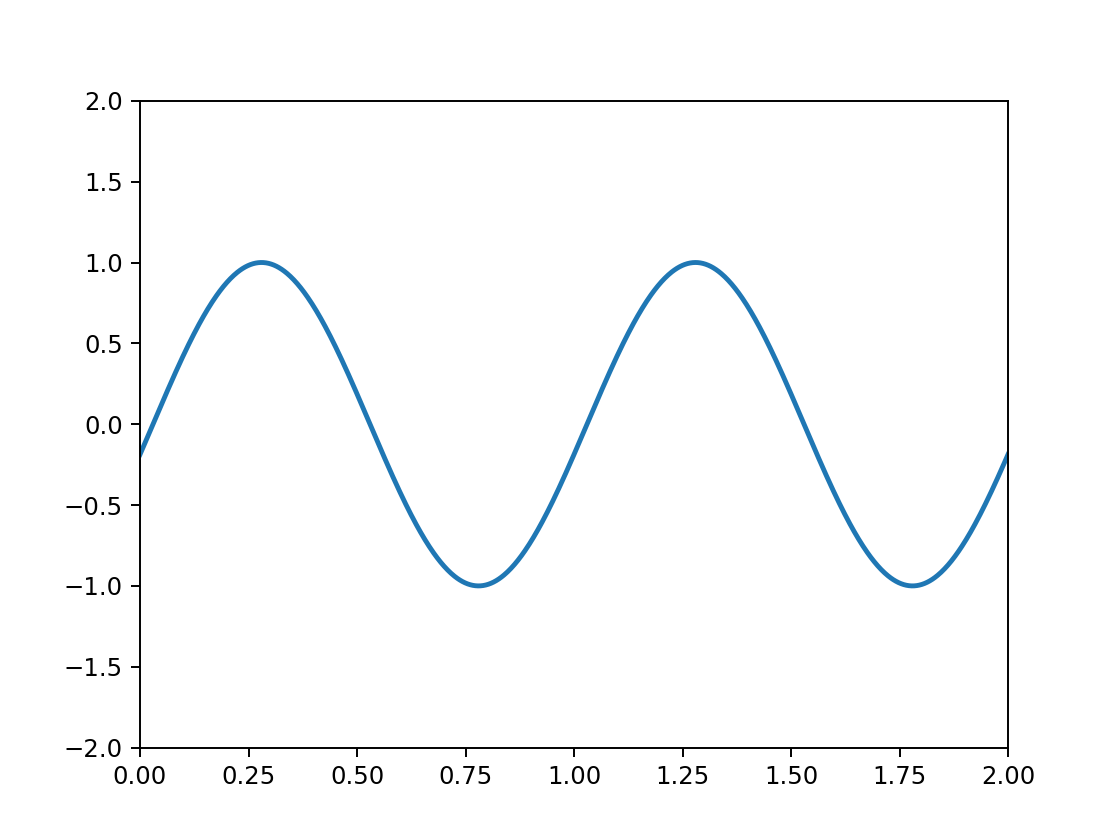

In [17]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

<IPython.core.display.Javascript object>


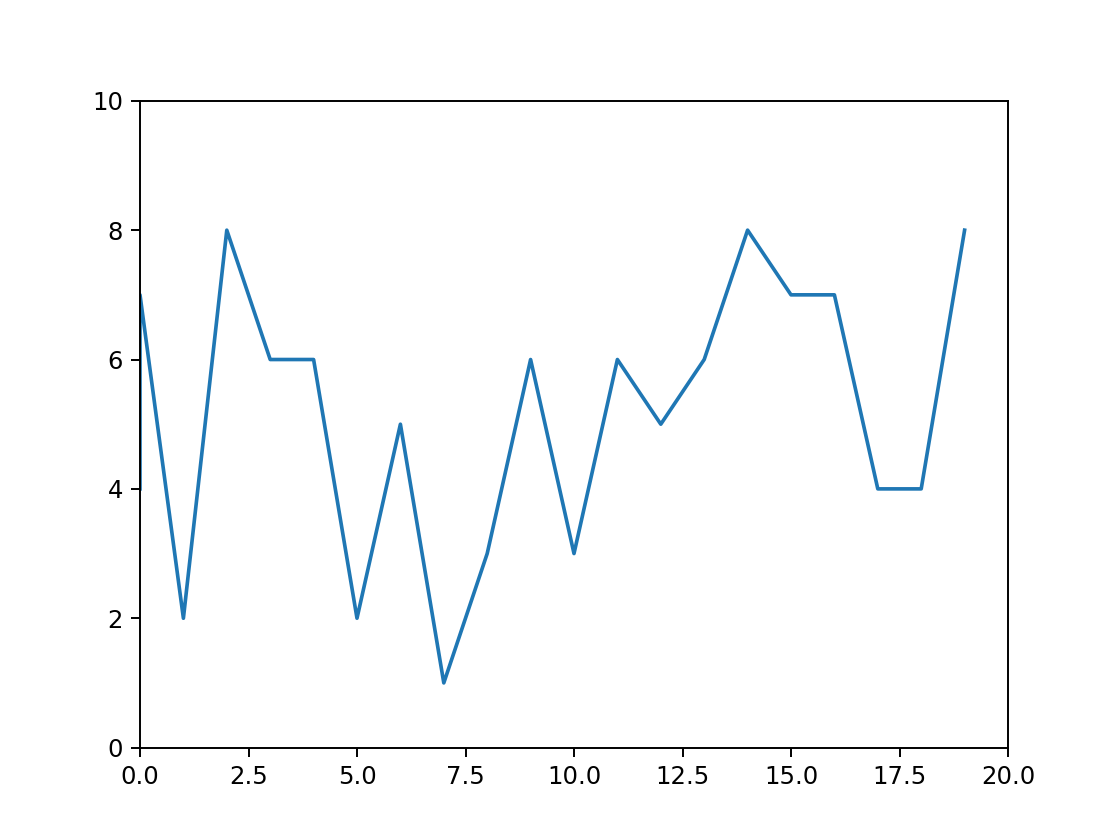

/home/danis/anaconda3/envs/python-science-tools/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [18]:
from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# create empty lists for the x and y data
x = []
y = []

# create the figure and axes objects
fig, ax = plt.subplots()

# function that draws each frame of the animation
def animate(i):
    pt = randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(i)
    y.append(pt)

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])
    
# run the animation
ani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)

plt.show()